In [ ]:
print('I')

I


In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/sms-spam.xlsx')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [4]:
pip install pandas


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


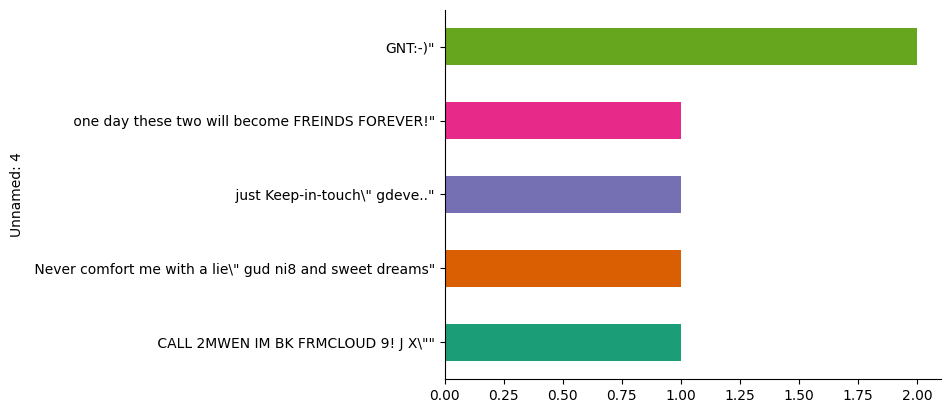

In [6]:
# @title Unnamed: 4

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
474,ham,Nice line said by a broken heart- Plz don't cu...,NaN,NaN,NaN
1053,ham,Jay's getting really impatient and belligerent,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN
332,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,NaN,NaN,NaN


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [10]:
df.rename(columns={'v1':'result','v2':'input'},inplace = True)

In [11]:
df['result'].value_counts()

,count
result,
ham,4825
spam,747


In [12]:
df.isnull().sum()

,0
result,0
input,0


In [13]:
df.duplicated().sum()

403

In [14]:
df= df.drop_duplicates()

In [15]:
df.shape

(5169, 2)

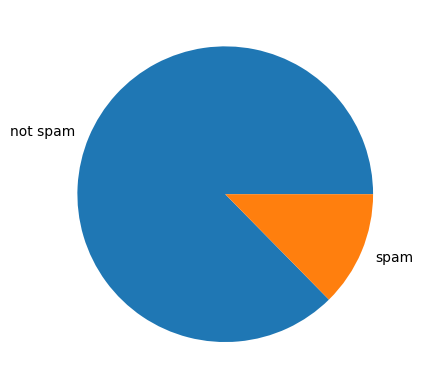

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['not spam','spam'])
plt.show()

In [17]:
pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [21]:
df.replace({"ham":0,"spam":1})

<ipython-input-21-42f21479c187>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"ham":0,"spam":1})


,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def transform_text(text):
  usefulwords = []
  text = text.lower()
  words = nltk.word_tokenize(text)
  for word in words:
    if word not in stopwords:
      usefulwords.append(word)
  print(words)
  return " ".join(usefulwords)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['countWords'] = df['input'].astype(str).apply(lambda i: len(nltk.word_tokenize(i)))

In [28]:
df['countCharacters'] = df['input'].astype(str).apply(len)

In [29]:
df['countSentences'] = df['input'].astype(str).apply(lambda i: len(nltk.sent_tokenize(i)))

In [30]:
df[['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['result']== 'ham'][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['result']== 'spam'][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

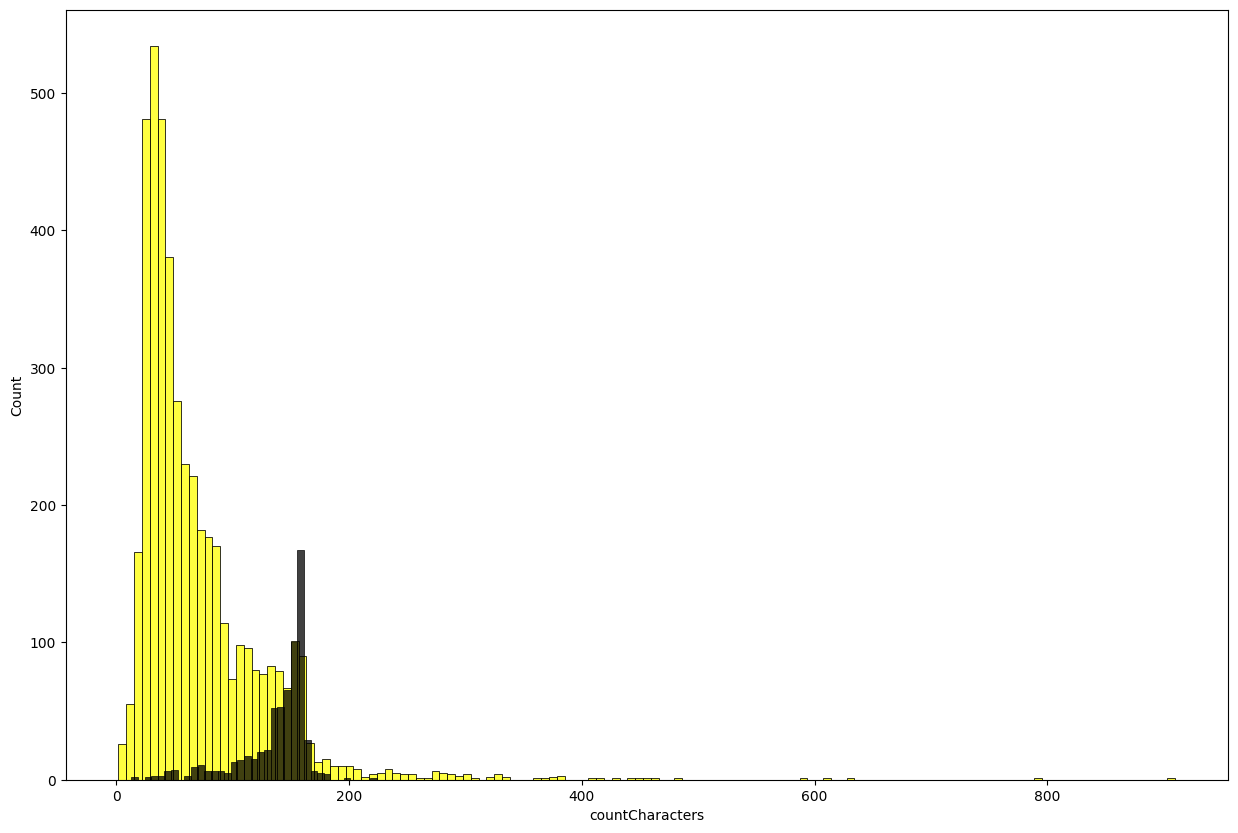

In [33]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['result']== 'ham']['countCharacters'], color = 'yellow')
sns.histplot(df[df['result']== 'spam']['countCharacters'], color = 'black')

<Axes: xlabel='countWords', ylabel='Count'>

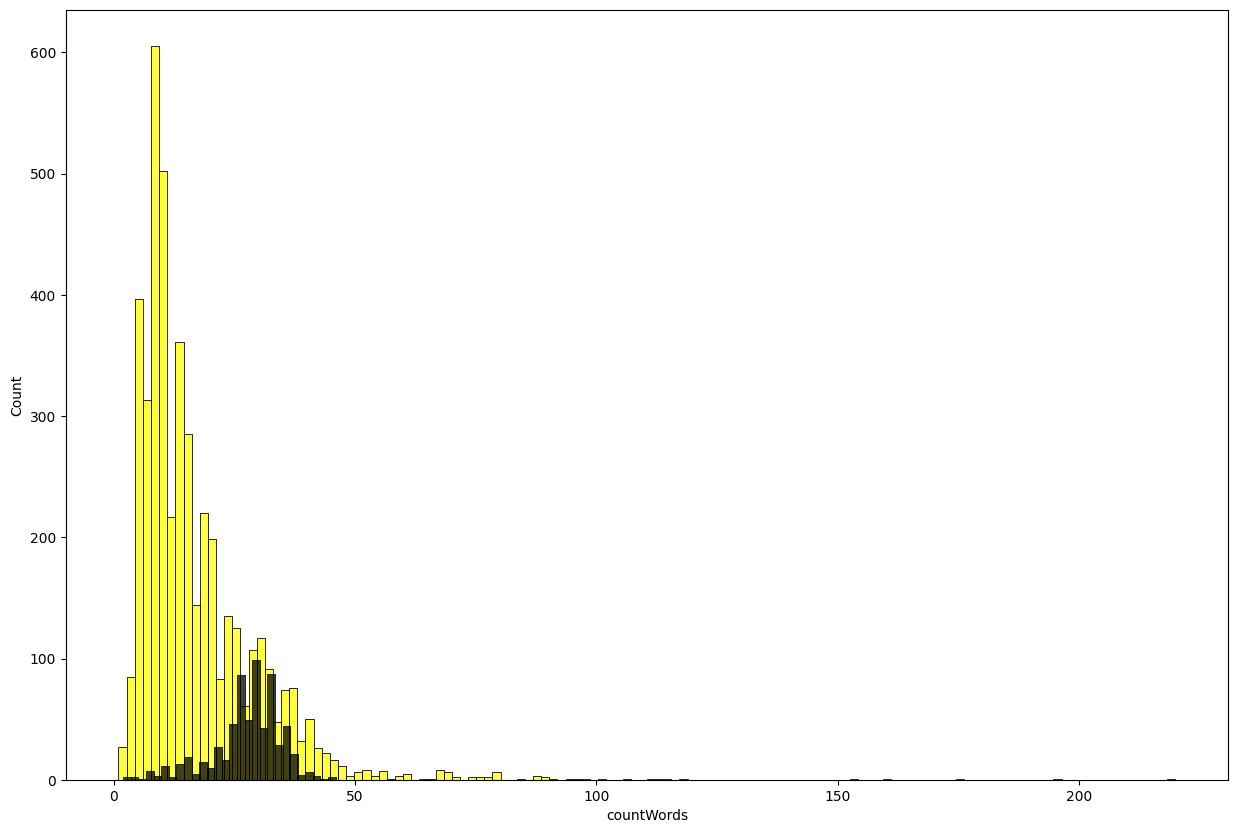

In [34]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['result']== 'ham']['countWords'], color = 'yellow')
sns.histplot(df[df['result']== 'spam']['countWords'], color = 'black')

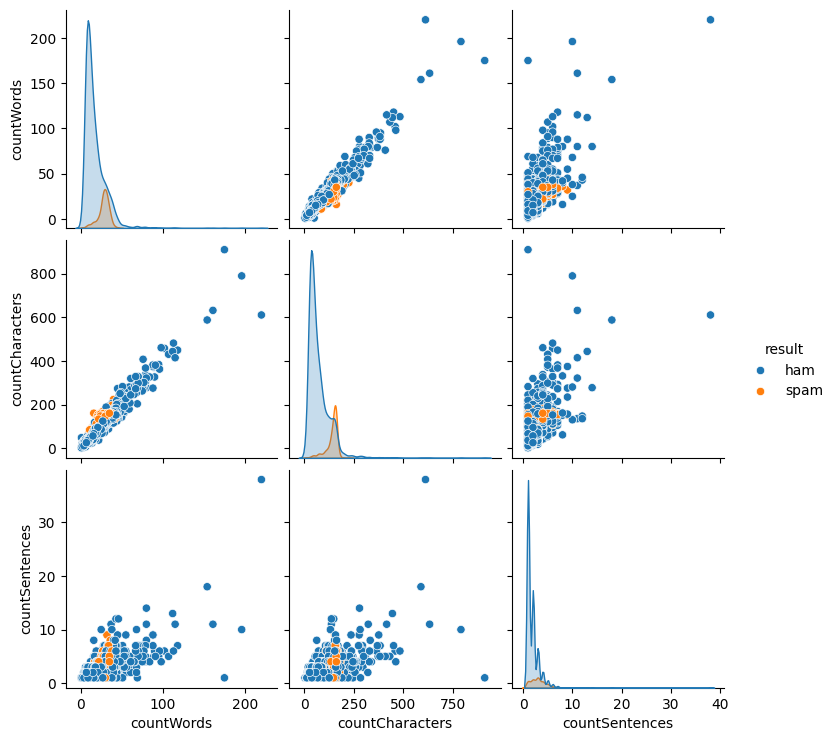

In [35]:
sns.pairplot(df, hue = 'result')

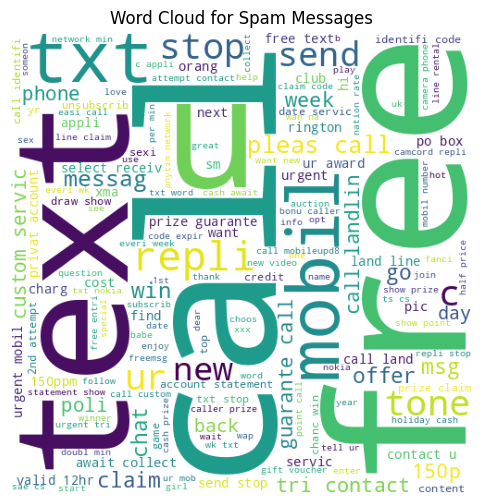

In [61]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ... (your existing code to load and preprocess the data) ...

def transform_text(text):
    # Convert text to string to handle potential non-string values
    text = str(text)

    #converting to lower case
    text = text.lower()

    #tokenization
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    #updating the text after removed special characters
    text = removedSC[:]

    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        # Use stopwords.words() here to call the function from the imported module
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]

    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]

    # Return a non-empty string if all words are removed
    if not text:
        return ""  # Or any placeholder you prefer
    else:
        return " ".join(text)

df['processed'] = df['input'].apply(transform_text)

# Filter for spam messages
spam_messages = df[df['result'] == 'spam']['processed']  # Use 'spam' instead of 1

# Check if there are any spam messages
if spam_messages.empty:
    print("No spam messages found in the dataset.")
else:
    # Combine processed text from all spam messages
    all_spam_text = spam_messages.str.cat(sep=" ")

    # Create and display the word cloud
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    spam_wordcloud = wc.generate(all_spam_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(spam_wordcloud)
    plt.axis("off")
    plt.title("Word Cloud for Spam Messages")
    plt.show()

In [ ]:
df['processed'] = df['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
df.head()

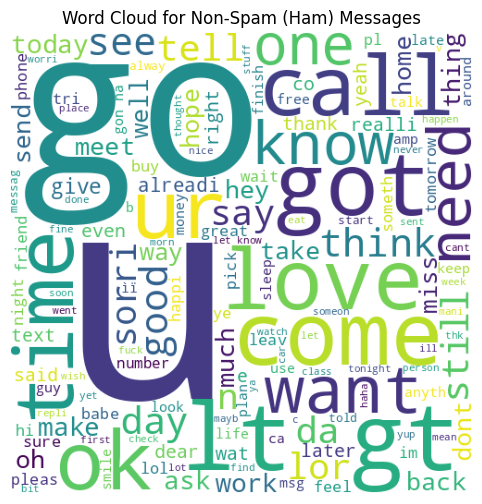

In [59]:
# Filter for non-spam (ham) messages using the original label 'ham'
ham_messages = df[df['result'] == 'ham']['processed']

# Combine processed text from all non-spam messages
all_ham_text = ham_messages.str.cat(sep=" ")

# Create and display the word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wordcloud = wc.generate(all_ham_text)  # Generate word cloud for non-spam

plt.figure(figsize=(12, 6))
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.title("Word Cloud for Non-Spam (Ham) Messages")  # Update title
plt.show()

In [64]:
# Ensure that you have run the line df.replace({"ham":0,"spam":1}) earlier
# to replace the labels in the 'result' column

spamWords = []

for msg in df[df['result'] == 'spam']['processed'].tolist():  # Replace 1 with 'spam' to filter correctly
    # Check if the message is not an empty string
    if msg:
        for word in msg.split():
            spamWords.append(word)

print(spamWords)  # Print the list of spam words

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [65]:
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

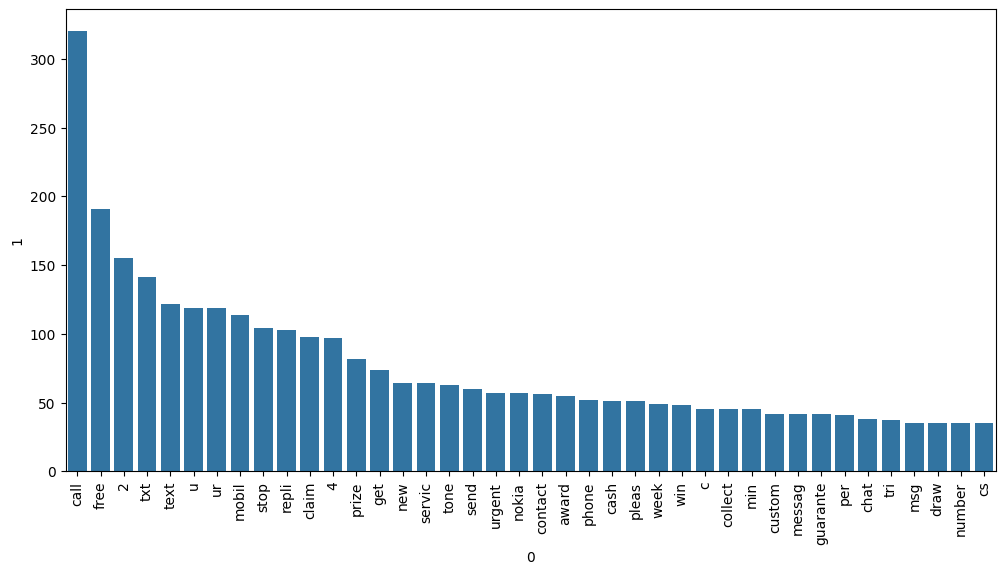

In [66]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
cv = CountVectorizer()
#transforming the data of processed column
X = cv.fit_transform(df['processed']).toarray()
X.shape

(5169, 6708)

In [68]:
y = df['result'].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)
#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1, pos_label='spam')) # Change pos_label to 'spam'

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [73]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2, pos_label='spam'))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [74]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3, pos_label='spam'))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [77]:
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
y = df['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [81]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1 , pos_label='spam'))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [82]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2, pos_label='spam'))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [83]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3, pos_label = 'spam'))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [84]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))